# Multi Objective Optimization

In [2]:
from wpaf_opt import *

x, moo_res_best, p_best, op_obj = wpaf_multi_opt()

KeyboardInterrupt: 

In [1]:
#print("Non Dominant Objective Functions=\n", moo_res_best.F)
#print("Non Dominant Design Variables=\n", moo_res_best.X)

# Pareto Front

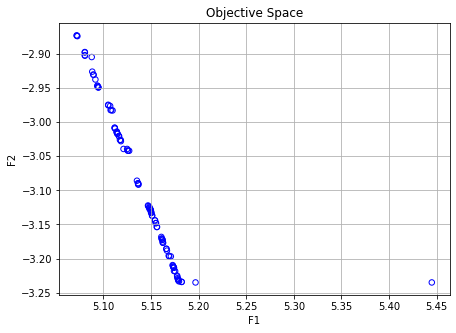

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(moo_res_best.F[:, 0], moo_res_best.F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.xlabel('F1')
plt.ylabel('F2')
plt.grid()
plt.show()

In [4]:
fl = moo_res_best.F.min(axis=0)
fu = moo_res_best.F.max(axis=0)

print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

Scale f1: [5.071987418422352, 5.444845251897035]
Scale f2: [-3.235023416514091, -2.8726733044852106]


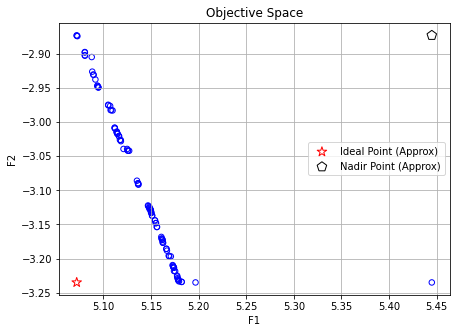

In [5]:
approx_ideal = moo_res_best.F.min(axis=0)
approx_nadir = moo_res_best.F.max(axis=0)

plt.figure(figsize=(7, 5))
plt.scatter(moo_res_best.F[:, 0], moo_res_best.F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(approx_ideal[0], approx_ideal[1], facecolors='none', edgecolors='red', marker="*", s=100, label="Ideal Point (Approx)")
plt.scatter(approx_nadir[0], approx_nadir[1], facecolors='none', edgecolors='black', marker="p", s=100, label="Nadir Point (Approx)")
plt.title("Objective Space")
plt.xlabel('F1')
plt.ylabel('F2')
plt.legend()
plt.grid()
plt.show()

Scale f1: [0.0, 1.0]
Scale f2: [0.0, 1.0]


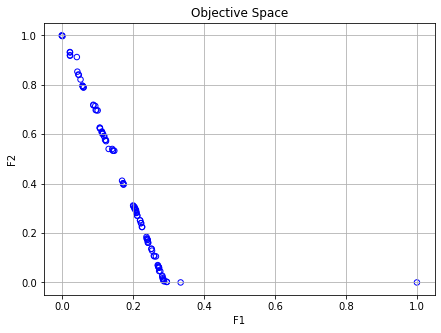

In [6]:
nF = (moo_res_best.F - approx_ideal) / (approx_nadir - approx_ideal)

fl = nF.min(axis=0)
fu = nF.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

plt.figure(figsize=(7, 5))
plt.scatter(nF[:, 0], nF[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.xlabel('F1')
plt.ylabel('F2')
plt.grid()
plt.show()

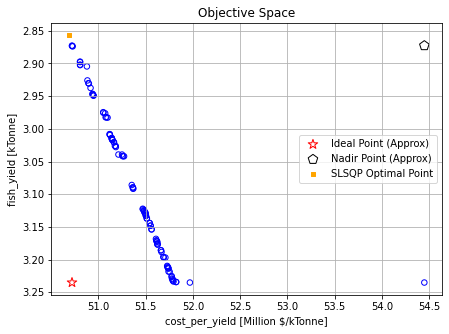

In [7]:
cost_per_yield = 10 * moo_res_best.F[:, 0]
fish_yield = -1 * moo_res_best.F[:, 1]
approx_ideal_tick = [min(cost_per_yield), max(fish_yield)] #min of OBJ
approx_nadir_tick = [max(cost_per_yield), min(fish_yield)] #max of OBJ


x_init, p_init, x, soo_res_best, p_best, op_obj = wpaf_single_opt()
aqua_opt_obj = Aqua_Obj(soo_res_best.x, x.name, p_best) 

plt.figure(figsize=(7, 5))
plt.scatter(cost_per_yield, fish_yield, s=30, facecolors='none', edgecolors='blue')
plt.scatter(approx_ideal_tick[0], approx_ideal_tick[1], facecolors='none', edgecolors='red', marker="*", s=100, label="Ideal Point (Approx)")
plt.scatter(approx_nadir_tick[0], approx_nadir_tick[1], facecolors='none', edgecolors='black', marker="p", s=100, label="Nadir Point (Approx)")
plt.scatter(aqua_opt_obj.cost_per_yield, aqua_opt_obj.pen.fish_yield/1000000, facecolors='orange', edgecolors='orange', marker="s", s=10, label="SLSQP Optimal Point")
plt.title("Objective Space")
plt.xlabel('cost_per_yield [Million $/kTonne]')
plt.ylabel('fish_yield [kTonne]')
plt.legend()
plt.gca().invert_yaxis()
plt.grid()
plt.show()